# I. Introduction to SciKit-learn

## Step 1. Import the necessary libraries

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Step 2. Import one of the toy datasets (digits) from Scikitlearn

This is a copy of the test of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where each class refers to a digit.

Each datapoint is 8x8 image of a digit, Classes=10, Samples per class ~180,

Samples total=1797, Dimensionality=64, and Features=(integers 0-16)

After importing this dataset, split it into test and train sets. You may check the shape of data and the target attributes of the dataset. You may also want to print a few samples from the dataset.


In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [5]:
digits.keys()
#digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [7]:
X, y = digits.data, digits.target

In [8]:
X.shape 
#1797 datapoints, each datapoint represented by 64 numbers

(1797, 64)

In [9]:
# How many datapoints are there per digit?
np.bincount(y)
# balanced dataset, almost equal number of digits in the dataset

array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,
                                                   random_state = 42)

In [12]:
X_train[0].shape

(64,)

In [14]:
X_train[0].reshape(8,8).shape

(8, 8)

<Figure size 432x288 with 0 Axes>

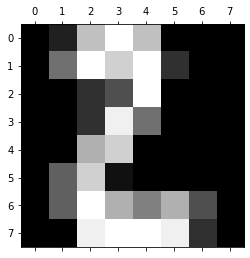

In [17]:
plt.gray()
plt.matshow(X_train[0].reshape(8,8))

# II. Sklearn API for model training

## Step 1. Import you model class

As an example, let us LinearSVC, a linear support vector classifier. 
This classifier is imported from sklearn.svm module which includes Support Vector Machine algorithms.

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
print(f"{knn.score(X_train, y_train):.2f}")
print(f"{knn.score(X_test, y_test):.2f}")

0.99
0.98


In [24]:
from sklearn.svm import LinearSVC

## Step 2. Instantiate an object and set the parameters

In [28]:
svm = LinearSVC()

## Step 3. Fit the model

When fitting the model, use the train dataset.

In [29]:
svm.fit(X_train, y_train)

/Users/ellen/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

## Step 4. Predict and Evaluate

Use the test set for this purpose, for now.

In [33]:
print(svm.predict(X_train))
print(y_train)

[2 1 2 ... 9 8 9]
[2 1 2 ... 9 8 9]


In [35]:
print(f"Score for train dataset using SVM: {svm.score(X_train, y_train):.4f}")

Score for train dataset using SVM: 0.9866


## Step 5. Try Another Algorithm

Try RandomForestClassifier this time, import it from sklearn.ensemble module.

Decision trees: binary questions
Random forest: forming many decision trees

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50) 
# n_estimators is the hyperparameter here = # of decision trees
print(rf.fit(X_train, y_train))
print(rf.score(X_test, y_test))

RandomForestClassifier(n_estimators=50)
0.9622222222222222


# III. Cross-validation

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

Learning the parameters of a prediction function and testing it on the same data is a
methodological mistake: a model that would just repeat the labels of the samples that
it has just seen would have a perfect score but would fail to predict anything useful on
yet-unseen data. This situation is called overfitting. To avoid it, it is common practice 
when performing a (supervised) machine learning experiment to hold out part of the 
available data as a test set X_test, y_test.

When evaluating different settings ("hyperparameters") for estimators, there is still a
risk of overfitting on the test set because the parameters can be tweaked until the
estimator performs optimally. This way, knowledge about the test set can "leak" into 
the model and evaluation metrics no longer report on generalization performance. To
solve this problem, yet another part of the dataset can be held out as a so-called
"validation set": training proceeds on the training set, after which evaluation is done on
the validation set, and when the eperiment seems to be successful, final evaluation
can be done on the test set.

However, by partitioning the available data into three sets, we drastically reduce the
number of samples which can be used for learning the model, and the results can
depend on a particular random choice for the pair of (train, validation)sets.

A solution to this problem is a procedure called cross-validation (CV for short). A test
set should still be held out for final evaluation, but the validation set is no longer
needed when doing CV. In the basic approach, called k-fold CV, the training set is split
nto k smaller sets (other approaches are described below, but generally follow the 
same principles). The following procedure is followed for each of the k "folds":
    
A model is trained using the folds as training data; the resulting model is validated
on the remaining part of the data (i.e., it is used as a test set to compute a performance
measure such as accuracy).

The performance measure reported by k-fold cross-validation is then the average of
the values computed in the loop. This approach can be computationally expensive, but 
does not waste too much data (as is the case when fixing an arbitrary validation set),
which is a major advantage in problems such as inverse inference where the number 
of samples is very small. 
(Check https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)


In [44]:
crossval_scores = []
neighbors = np.arange(1,15,2) # array of odd numbers from 1 to <15
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    scores = cross_val_score(knn, X_train, y_train, cv = 10)
    crossval_scores.append(np.mean(scores))

In [46]:
np.max(crossval_scores)

0.990342730790492

In [47]:
neighbors

array([ 1,  3,  5,  7,  9, 11, 13])

In [45]:
crossval_scores

[0.990342730790492,
 0.9888557213930348,
 0.9888667772249862,
 0.9836760641238254,
 0.9829187396351575,
 0.9814317302377005,
 0.9807020453289109]

As we see, the maximum score correspond to the first value in neighbors.

In [52]:
ind_max_score = np.argmax(crossval_scores)
print(ind_max_score)

0


In [50]:
crossval_scores[np.argmax(crossval_scores)]

0.990342730790492

In [53]:
neighbors[ind_max_score]

1

# Grid Searches

Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

## Grid-Search with build-in cross validation

A GridSearchCV object behaves just like a normal classifier.

In [59]:
myparam = {'n_neighbors':np.arange(1,30,2)} # dict with key: param

In [61]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(KNeighborsClassifier(), param_grid = myparam,
                   cv = 10, return_train_score = True)
# if you don't include return_train_score=True you only get the validation scores,
# instead of the train and test(validation) scores

In [62]:
grid

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])},
             return_train_score=True)

In [63]:
grid.fit(X_train, y_train) 

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])},
             return_train_score=True)

In [64]:
grid.best_score_ # attribute
# returns the best score out of 13 k values, the best mean score is 0.99

0.990342730790492

In [65]:
grid.best_params_

{'n_neighbors': 1}

In [ ]:
# returns a dictionary with results of the split for train a test datasets
grid.cv_results_ 

In [ ]:
grid.score(X_test, y_test)
# returns of the score of the best model of this test dataset

In [66]:
import pandas as pd

# turn cv_results_ dictionary into dataframe for better reading of results
results = pd.DataFrame(grid.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.000688,0.000617,0.005704,0.002320,1,{'n_neighbors': 1},1.000000,0.992593,1.000000,0.970370,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.000471,0.000188,0.005326,0.000900,3,{'n_neighbors': 3},0.992593,0.985185,0.985185,0.985185,...,0.994224,0.996700,0.994224,0.995875,0.995050,0.996702,0.995054,0.995878,0.995298,0.000908
2,0.000388,0.000017,0.005521,0.000916,5,{'n_neighbors': 5},0.992593,0.985185,0.985185,0.985185,...,0.989274,0.993399,0.991749,0.994224,0.992574,0.992580,0.992580,0.991756,0.992081,0.001391
3,0.000376,0.000007,0.005112,0.000313,7,{'n_neighbors': 7},0.992593,0.985185,0.977778,0.962963,...,0.987624,0.989274,0.986799,0.991749,0.989274,0.990932,0.987634,0.986810,0.988782,0.001573
4,0.000373,0.000004,0.005078,0.000224,9,{'n_neighbors': 9},0.992593,0.985185,0.977778,0.962963,...,0.984323,0.985974,0.983498,0.988449,0.985974,0.985161,0.985161,0.983512,0.984987,0.001556


In [67]:
results.columns 

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'split5_test_score', 'split6_test_score', 'split7_test_score',
       'split8_test_score', 'split9_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'split5_train_score', 'split6_train_score',
       'split7_train_score', 'split8_train_score', 'split9_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

/Users/ellen/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
/Users/ellen/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


<AxesSubplot:xlabel='param_n_neighbors'>

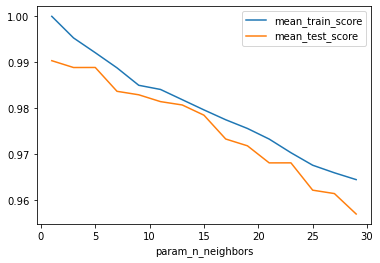

In [70]:
results.plot('param_n_neighbors','mean_train_score')
results.plot('param_n_neighbors','mean_test_score',ax=plt.gca())

As the number of neighbors changes, the score changes.